In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sens_feat(phi, X):
    rotation_matrix = np.array([[np.cos(phi), -np.sin(phi)], [np.sin(phi), np.cos(phi)]])
    return X @ rotation_matrix

def cos_sim(x,y):
    return np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

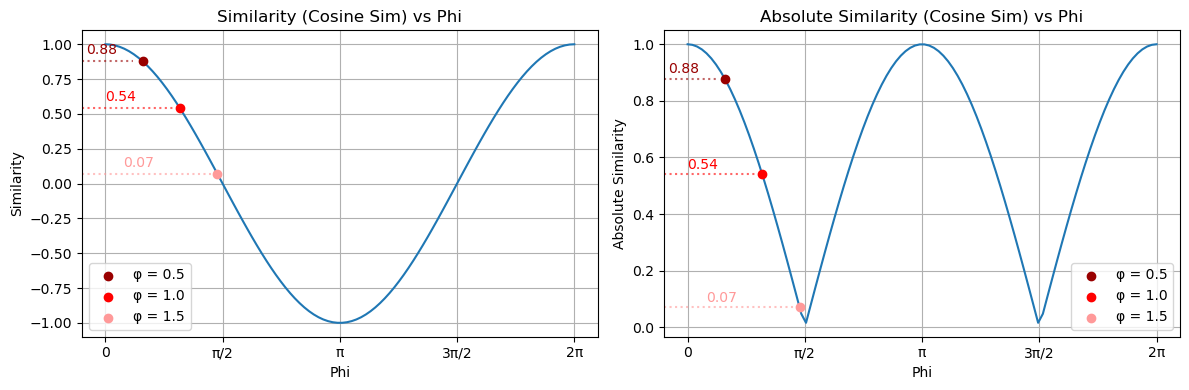

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define x and phi values
x = np.array([2,3])
phi_values = np.linspace(0, 2*np.pi, 100)

# Compute similarity and absolute similarity
similarity = [cos_sim(sens_feat(phi, x), x) for phi in phi_values]
abs_similarity = [abs(cos_sim(sens_feat(phi, x), x)) for phi in phi_values]

# Define target phi values
phi_targets = [0.5, 1, 1.5]
similarity_targets = [cos_sim(sens_feat(phi, x), x) for phi in phi_targets]
abs_similarity_targets = [abs(sim) for sim in similarity_targets]

# Create a figure with two subplots
reds = ['#990000', '#FF0000', '#FF9999']  # Light Red, Red, Dark Red
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot similarity vs phi
ax1.plot(phi_values, similarity)
for i, (phi_t, sim_t) in enumerate(zip(phi_targets, similarity_targets)):
    ax1.scatter(phi_t, sim_t, color=reds[i], zorder=3, label=f'φ = {phi_t:.1f}')  # Red dot
    ax1.axhline(y=sim_t, xmin=0, xmax=phi_t/(2*np.pi) +0.02, color=reds[i], linestyle='dotted', alpha=0.6)  # Limited line
    ax1.text(phi_t/2 - 0.3, sim_t + 0.05, f'{sim_t:.2f}', color=reds[i], fontsize=10, ha='center')  # Value above the line


ax1.set_xlabel('Phi')
ax1.set_ylabel('Similarity')
ax1.set_title('Similarity (Cosine Sim) vs Phi')
ax1.set_xticks([0, 1/2*np.pi, np.pi, 3/2*np.pi, 2*np.pi])
ax1.set_xticklabels(['0', 'π/2', 'π', '3π/2', '2π'])
ax1.legend()
ax1.grid(True)

# Plot absolute similarity vs phi
ax2.plot(phi_values, abs_similarity)
for i, (phi_t, abs_sim_t) in enumerate(zip(phi_targets, abs_similarity_targets)):
    ax2.scatter(phi_t, abs_sim_t, color=reds[i], zorder=3, label=f'φ = {phi_t:.1f}')  # Red dot
    ax2.axhline(y=abs_sim_t, xmin=0, xmax=phi_t/(2*np.pi)+0.02, color=reds[i], linestyle='dotted', alpha=0.6)  # Limited line
    ax2.text(phi_t/2 -0.3, abs_sim_t + 0.02, f'{abs_sim_t:.2f}', color=reds[i], fontsize=10, ha='center')  # Value above the line
    
ax2.set_xlabel('Phi')
ax2.set_ylabel('Absolute Similarity')
ax2.set_title('Absolute Similarity (Cosine Sim) vs Phi')
ax2.set_xticks([0, 1/2*np.pi, np.pi, 3/2*np.pi, 2*np.pi])
ax2.set_xticklabels(['0', 'π/2', 'π', '3π/2', '2π'])
ax2.legend()
ax2.grid(True)

# Adjust the spacing between subplots
plt.tight_layout()
plt.savefig(f"img/Rotation_Matrix_Sens_Attribute/Cosine_Similarity.png")
# Show the figure
plt.show()
